In [6]:
import numpy as np
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
import networkx as nx
import matplotlib.pyplot as plt
g = nx.karate_club_graph()

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-62gpuq52 because the default path (/home/bakingsoda/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [7]:
g.number_of_nodes(), g.number_of_edges()

(34, 78)

In [8]:
communities = greedy_modularity_communities(g)
colors = np.zeros(g.number_of_nodes())
for i, com in enumerate(communities):
    print(list(com))
    colors[list(com)] = i
print(colors)
n_classes = np.unique(colors).shape[0]
labels = np.eye(n_classes)[colors.astype(int)]

[32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[1, 2, 3, 7, 9, 12, 13, 17, 21]
[0, 4, 5, 6, 10, 11, 16, 19]
[2. 1. 1. 1. 2. 2. 2. 1. 0. 1. 2. 2. 1. 1. 0. 0. 2. 1. 0. 2. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


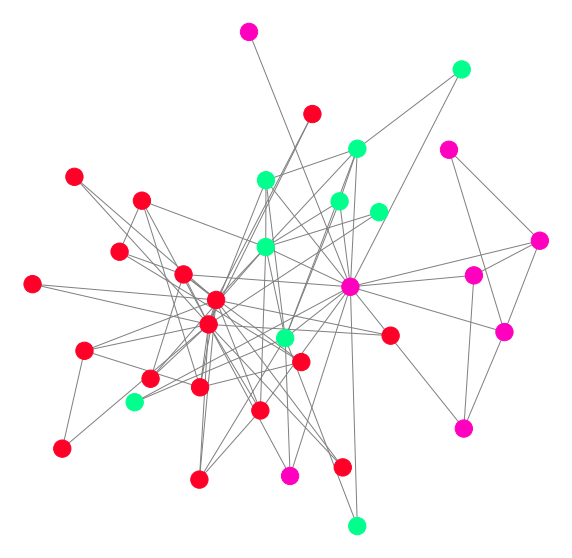

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
pos = nx.spring_layout(g, k=5/np.sqrt(g.number_of_nodes()))
kwargs = {"cmap": 'gist_rainbow', "edge_color":'gray'}
nx.draw(
    g, pos, with_labels=False, 
    node_color=colors, 
    ax=ax, **kwargs)

In [ ]:
A = nx.to_numpy_matrix(g)
A

In [14]:
g.node_attr_dict_factory()

{}

In [15]:
#Get the Adjacency Matrix (A) and Node Features Matrix (X) as numpy array
A = np.array(nx.attr_matrix(g)[0])
X = np.array(nx.attr_matrix(g)[1])
X = np.expand_dims(X,axis=1)

print('Shape of A: ', A.shape)
print('\nShape of X: ', X.shape)
print('\nAdjacency Matrix (A):\n', A)
print('\nNode Features Matrix (X):\n', X)

Shape of A:  (34, 34)

Shape of X:  (34, 1)

Adjacency Matrix (A):
 [[0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]

Node Features Matrix (X):
 [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]]


In [16]:

#Dot product Adjacency Matrix (A) and Node Features (X)
AX = np.dot(A,X)
print("Dot product of A and X (AX):\n", AX)

Dot product of A and X (AX):
 [[170.]
 [112.]
 [128.]
 [ 35.]
 [ 16.]
 [ 32.]
 [ 25.]
 [  6.]
 [ 97.]
 [ 35.]
 [  9.]
 [  0.]
 [  3.]
 [ 39.]
 [ 65.]
 [ 65.]
 [ 11.]
 [  1.]
 [ 65.]
 [ 34.]
 [ 65.]
 [  1.]
 [ 65.]
 [146.]
 [ 83.]
 [ 78.]
 [ 62.]
 [ 82.]
 [ 66.]
 [114.]
 [ 74.]
 [142.]
 [245.]
 [364.]]


In [20]:
G_self_loops = g.copy()

self_loops = []
for i in range(g.number_of_nodes()):
    self_loops.append((i,i))
G_self_loops.add_edges_from(self_loops)

#Check the edges of G_self_loops after adding the self loops
print('Edges of G with self-loops:\n', G_self_loops.edges)

#Get the Adjacency Matrix (A) and Node Features Matrix (X) of added self-lopps graph
A_hat = np.array(nx.attr_matrix(G_self_loops)[0])
print('Adjacency Matrix of added self-loops G (A_hat):\n', A_hat)

#Calculate the dot product of A_hat and X (AX)
AX = np.dot(A_hat, X)
print('AX:\n', AX)

Edges of G with self-loops:
 [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (0, 0), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (1, 1), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (2, 2), (3, 7), (3, 12), (3, 13), (3, 3), (4, 6), (4, 10), (4, 4), (5, 6), (5, 10), (5, 16), (5, 5), (6, 16), (6, 6), (7, 7), (8, 30), (8, 32), (8, 33), (8, 8), (9, 33), (9, 9), (10, 10), (11, 11), (12, 12), (13, 33), (13, 13), (14, 32), (14, 33), (14, 14), (15, 32), (15, 33), (15, 15), (16, 16), (17, 17), (18, 32), (18, 33), (18, 18), (19, 33), (19, 19), (20, 32), (20, 33), (20, 20), (21, 21), (22, 32), (22, 33), (22, 22), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (23, 23), (24, 25), (24, 27), (24, 31), (24, 24), (25, 31), (25, 25), (26, 29), (26, 33), (26, 26), (27, 33), (27, 27), (28, 31), (28, 33), (28, 28), (29, 32), (29, 33), (29, 29), (30, 32), (30, 33), (30

In [21]:
#Get the Degree Matrix of the added self-loops graph
Deg_Mat = G_self_loops.degree()
print('Degree Matrix of added self-loops G (D): ', Deg_Mat)

#Convert the Degree Matrix to a N x N matrix where N is the number of nodes
D = np.diag([deg for (n,deg) in list(Deg_Mat)])
print('Degree Matrix of added self-loops G as numpy array (D):\n', D)

#Find the inverse of Degree Matrix (D)
D_inv = np.linalg.inv(D)
print('Inverse of D:\n', D_inv)

#Dot product of D and AX for normalization
DAX = np.dot(D_inv,AX)
print('DAX:\n', DAX)

Degree Matrix of added self-loops G (D):  [(0, 18), (1, 11), (2, 12), (3, 8), (4, 5), (5, 6), (6, 6), (7, 6), (8, 7), (9, 4), (10, 5), (11, 3), (12, 4), (13, 7), (14, 4), (15, 4), (16, 4), (17, 4), (18, 4), (19, 5), (20, 4), (21, 4), (22, 4), (23, 7), (24, 5), (25, 5), (26, 4), (27, 6), (28, 5), (29, 6), (30, 6), (31, 8), (32, 14), (33, 19)]
Degree Matrix of added self-loops G as numpy array (D):
 [[18  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0 14  0]
 [ 0  0  0 ...  0  0 19]]
Inverse of D:
 [[0.05555556 0.         0.         ... 0.         0.         0.        ]
 [0.         0.09090909 0.         ... 0.         0.         0.        ]
 [0.         0.         0.08333333 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.125      0.         0.        ]
 [0.         0.         0.         ... 0.         0.07142857 0.        ]
 [0.         0.         0.         ... 0.         0.      

In [27]:

from scipy.linalg import fractional_matrix_power
#Symmetrically-normalization
D_half_norm = fractional_matrix_power(D, -0.5)
DADX = D_half_norm.dot(A_hat).dot(D_half_norm).dot(X)
print('DADX:\n', DADX)
print(DADX.shape)

DADX:
 [[17.51133484]
 [14.91133551]
 [14.24079415]
 [ 5.55460589]
 [ 3.89544512]
 [ 6.92506152]
 [ 5.8296164 ]
 [ 1.95847312]
 [12.08412657]
 [ 6.32403474]
 [ 3.71287093]
 [ 3.66666667]
 [ 3.53033009]
 [ 5.45167609]
 [11.56153948]
 [11.81153948]
 [ 6.2453656 ]
 [ 4.40075567]
 [12.56153948]
 [ 7.32056853]
 [13.06153948]
 [ 5.40075567]
 [13.56153948]
 [22.2464242 ]
 [19.63103339]
 [18.58923995]
 [16.20495982]
 [15.75719295]
 [14.14545782]
 [20.27175758]
 [12.93973771]
 [21.75013822]
 [28.85462804]
 [37.12911562]]
(34, 1)


In [24]:
np.random.seed(77777)
n_h = 4 #number of neurons in the hidden layer
n_y = 2 #number of neurons in the output layer
W0 = np.random.randn(X.shape[1],n_h) * 0.01
W1 = np.random.randn(n_h,n_y) * 0.01

#Implement ReLu as activation function
def relu(x):
    return np.maximum(0,x)

#Build GCN layer
#In this function, we implement numpy to simplify
def gcn(A,H,W):
    I = np.identity(A.shape[0]) #create Identity Matrix of A
    A_hat = A + I #add self-loop to A
    D = np.diag(np.sum(A_hat, axis=0)) #create Degree Matrix of A
    D_half_norm = fractional_matrix_power(D, -0.5) #calculate D to the power of -0.5
    eq = D_half_norm.dot(A_hat).dot(D_half_norm).dot(H).dot(W)
    return relu(eq)

In [26]:
#Do forward propagation
H1 = gcn(A,X,W0)
print(H1.shape)
H2 = gcn(A,H1,W1)
print(H2.shape)
print('Features Representation from GCN output:\n', H2)

(34, 4)
(34, 2)
Features Representation from GCN output:
 [[0.00247679 0.        ]
 [0.00193332 0.        ]
 [0.00265375 0.        ]
 [0.0013896  0.        ]
 [0.00098271 0.        ]
 [0.00129741 0.        ]
 [0.00130504 0.        ]
 [0.00128849 0.        ]
 [0.00257873 0.        ]
 [0.00171151 0.        ]
 [0.0010285  0.        ]
 [0.00095021 0.        ]
 [0.00088925 0.        ]
 [0.00189165 0.        ]
 [0.00241692 0.        ]
 [0.00243388 0.        ]
 [0.00103836 0.        ]
 [0.0012185  0.        ]
 [0.00248476 0.        ]
 [0.00189599 0.        ]
 [0.00251868 0.        ]
 [0.00128635 0.        ]
 [0.00255261 0.        ]
 [0.00376106 0.        ]
 [0.00315961 0.        ]
 [0.00332972 0.        ]
 [0.00288351 0.        ]
 [0.00313578 0.        ]
 [0.00251655 0.        ]
 [0.00358405 0.        ]
 [0.0025327  0.        ]
 [0.00378744 0.        ]
 [0.00475471 0.        ]
 [0.00531299 0.        ]]


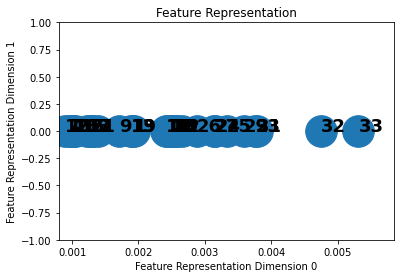

In [28]:
def plot_features(H2):
    #Plot the features representation
    x = H2[:,0]
    y = H2[:,1]

    size = 1000

    plt.scatter(x,y,size)
    plt.xlim([np.min(x)*0.9, np.max(x)*1.1])
    plt.ylim([-1, 1])
    plt.xlabel('Feature Representation Dimension 0')
    plt.ylabel('Feature Representation Dimension 1')
    plt.title('Feature Representation')

    for i,row in enumerate(H2):
        str = "{}".format(i)
        plt.annotate(str, (row[0],row[1]),fontsize=18, fontweight='bold')

    plt.show()


plot_features(H2)

In [29]:
import torch
import community as community_louvain
from torch_geometric.data import InMemoryDataset, Data

x = torch.eye(g.number_of_nodes(), dtype=torch.float)

adj = nx.to_scipy_sparse_matrix(g).tocoo()
row = torch.from_numpy(adj.row.astype(np.int64)).to(torch.long)
col = torch.from_numpy(adj.col.astype(np.int64)).to(torch.long)
edge_index = torch.stack([row, col], dim=0)

# Compute communities.
partition = community_louvain.best_partition(g)
y = torch.tensor([partition[i] for i in range(g.number_of_nodes())])

# Select a single training node for each community
# (we just use the first one).
train_mask = torch.zeros(y.size(0), dtype=torch.bool)
for i in range(int(y.max()) + 1):
    train_mask[(y == i).nonzero(as_tuple=False)[0]] = True
data = Data(x=x, edge_index=edge_index, y=y, train_mask=train_mask)

In [30]:
data

Data(edge_index=[2, 156], train_mask=[34], x=[34, 34], y=[34])

In [31]:
from torch_geometric.nn import GCNConv

In [39]:

LAYER= GCNConv(data.num_features, 2)
embedding = LAYER(data.x, data.edge_index)
embedding_np = embedding.detach().numpy()

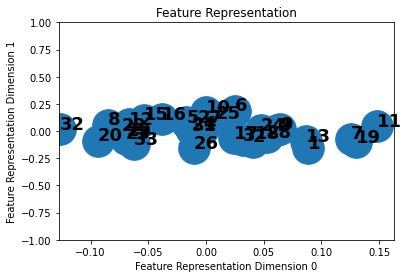

In [40]:
plot_features(embedding_np)